# Collecting and Assessing Additional King County Data

In order to suffice the second need of our client, we need to find neighborhoods with ideal conditions for hiding from the FBI.
We could simply follow the vage description from the assignment table and focus on outskirt neighborhoods. But how can we classify the zip codes of King county as outskirts and aren't there more conditions we should consider to best serve our client?

We deside to include three conditions in our assessment whether a neighborhood in King County satisfies our clients needs, and do a little internet research. We consider the type of **geographical area** (urban/rural), the **accessability by car**, and the level of **public surveillance** within a neighborhood.
All three conditions are graded for each zip code area from 1 to 4, classifying neighborhoods as follows:

* **Geographical area** (acceptable conditions: 2 & 3)

    1. Seattle City Center
    2. Inner Outskirts
    3. Outer Outskirts
    4. Rural

* **Accessability by car** (acceptable conditions: 1 & 2)

    1. Good
    2. Medium
    3. Low
    4. Minimal

* **Public surveillance** (acceptable conditions: 3 & 4)

    1. Good
    2. Medium
    3. Low
    4. Minimal

Acceptable conditions are given in paranthese. All have to be met for a zip code area  to be a viable option for our client.

### Imports, Path Definitions, and Read Project Data

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patches as mpatches

# Set path to images
p_images = '../reports/images/'

In [126]:
# import data from csv-file
df = pd.read_csv('../data/eda.csv')

# get unique zipcodes
df_zip = np.sort(df.zipcode.unique())

## Prepare Conditions

#### Create Dictionaries mapping Zip Codes and Classifications

In [127]:
# geographical area
area_center = {
    98102, 98103, 98105, 98109, 98112, 98115, 98119, 98122, 98144,
}
area_inner = {
    98004, 98005, 98006, 98007, 98008, 98032, 98033, 98034, 98039, 98040, 98055,
    98056, 98059, 98106, 98107, 98108, 98117, 98116, 98118, 98125, 98126, 98133,
    98136, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98199
}
area_outer = {
    98001, 98002, 98003, 98011, 98023, 98027, 98028, 98029, 98030, 98031, 98038,
    98042, 98052, 98053, 98058, 98070, 98072, 98074, 98075, 98092, 
}
area_rural = {
    98010, 98014, 98019, 98022, 98024, 98045, 98065, 98077, 98198
}

# accessibility by car and Plain
access_good = {
    98001, 98003, 98004, 98005, 98006, 98007, 98008, 98032, 98052, 98102, 98103,
    98105, 98108, 98109, 98119, 98122, 98148
}
access_medium = {
    98027, 98030, 98039, 98055, 98059, 98074, 98002, 98106, 98107, 98112, 98115,
    98118, 98125, 98126, 98133
}
access_low = {
    98022, 98023, 98024, 98029, 98031, 98033, 98034, 98040, 98042, 98045, 98053,
    98056, 98065, 98075, 98077, 98116, 98117, 98136, 98144, 98146, 98166, 98177,
    98178
}
access_min = {
    98010, 98011, 98014, 98019, 98028, 98038, 98058, 98092, 98070, 98072, 98155,
    98168, 98188, 98198, 98199
}

# public surveillance
surveil_high = {
    98072, 98102, 98103, 98105, 98106, 98108, 98109, 98133, 98144, 98146, 98148,
    98188
}
surveil_medium = {
    98004, 98005, 98006, 98007, 98008, 98039, 98107, 98199
}
surveil_low = {
    98001, 98002, 98003, 98011, 98027, 98028, 98029, 98030, 98031, 98032, 98033,
    98034, 98038, 98040, 98042, 98052, 98053, 98055, 98056, 98058, 98074, 98075,
    98092, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98136,
    98059, 98065, 98166, 98168
}
surveil_min = {
    98010, 98014, 98019, 98022, 98023, 98024, 98045, 98070, 98077, 98177, 98178,
    98198
}

d_geogr = {
    'City Center': list(area_center),
    'Inner Outskirts': list(area_inner),
    'Outer Outskirts': list(area_outer),
    'Rural Areas': list(area_rural)
}
d_access = {
    'Good': list(access_good),
    'Medium': list(access_medium),
    'Low': list(access_low),
    'Min': list(access_min)
}
d_surveil = {
    'High': list(surveil_high),
    'Medium': list(surveil_medium),
    'Low': list(surveil_low),
    'Min': list(surveil_min)
}

pd.DataFrame(dict([(k,pd.Series(v)) for k,v in d_geogr.items()])).to_csv(
    '../data/zip_codes_classification_geo.csv', index=False)
pd.DataFrame(dict([(k,pd.Series(v)) for k,v in d_access.items()])).to_csv(
    '../data/zip_codes_classification_access.csv', index=False)
pd.DataFrame(dict([(k,pd.Series(v)) for k,v in d_surveil.items()])).to_csv(
    '../data/zip_codes_classification_surveil.csv', index=False)

# list all zip codes of King County, WA
all_zip = [98052,98105,98092,98115,98023,98103,98003,98042,98034,98133,98118,
    98125,98031,98058,98122,98032,98059,98033,98004,98006,98001,98117,98030,
    98056,98155,98198,98168,98002,98038,98109,98040,98029,98027,98074,98146,
    98144,98007,98072,98011,98188,98008,98107,98106,98178,98116,98075,98108,
    98112,98028,98119,98055,98053,98126,98199,98177,98022,98102,98166,98005,
    98121,98136,98045,98101,98104,98077,98057,98065,98019,98070,98148,98014,
    98354,98051,98010,98024,98047,98151,98134,98039,98158,98195,98288,
    98174,98054,98132,98171,98184,98224,98164,98181,98009,98013,98015,98025,
    98035,98041,98050,98062,98064,98063,98071,98073,98083,98089,98093,98111,
    98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98154,98160,
    98161,98165,98170,98175,98185,98190,98194,9819]

pd.DataFrame({'zipcode': list(all_zip)}).to_csv('../data/zip_codes_king_county.csv',
                                                    index=False)

#### Create DataFrame Containing Conditions for each Zip Code Area

In [128]:
df_categories = pd.DataFrame(data=df_zip, columns=['zipcode'])
df_categories['geo_area'] = 1
df_categories['accessibility'] = 1
df_categories['surveillance'] = 1

# set zip code area categories
for i in df_categories['zipcode']:
    if i in area_center:
        pass
    elif i in area_inner:
        df_categories.loc[df_categories['zipcode'] == i, 'geo_area'] = 2
    elif i in area_outer:
        df_categories.loc[df_categories['zipcode'] == i, 'geo_area'] = 3
    else:
        df_categories.loc[df_categories['zipcode'] == i, 'geo_area'] = 4

    if i in access_good:
        pass
    elif i in access_medium:
        df_categories.loc[df_categories['zipcode'] == i, 'accessibility'] = 2
    elif i in access_low:
        df_categories.loc[df_categories['zipcode'] == i, 'accessibility'] = 3
    else:
        df_categories.loc[df_categories['zipcode'] == i, 'accessibility'] = 4

    if i in surveil_high:
        pass
    elif i in surveil_medium:
        df_categories.loc[df_categories['zipcode'] == i, 'surveillance'] = 2
    elif i in surveil_low:
        df_categories.loc[df_categories['zipcode'] == i, 'surveillance'] = 3
    else:
        df_categories.loc[df_categories['zipcode'] == i, 'surveillance'] = 4

## Visualize Conditions for King County

#### Preparation

In [129]:
# Load ZIP code boundaries for King County
shapefile_path = '../data/zip_codes_wa/zip_codes_wa.shp'   # path to map file

zip_shapes = gpd.read_file(shapefile_path)
zip_shapes = zip_shapes[zip_shapes['ZCTA5CE20'].astype(int).isin(all_zip)]
zip_shapes = zip_shapes.rename(columns={'ZCTA5CE20': 'zipcode'})
zip_shapes['zipcode'] = zip_shapes['zipcode'].astype(int)
zip_shapes['zip3'] = zip_shapes['zipcode'].astype(str)
zip_shapes['zip3'] = zip_shapes['zip3'].apply(lambda x: x[-3:])

# swap lat and lon
cols = list(zip_shapes.columns)
a, b = cols.index('INTPTLAT20'), cols.index('INTPTLON20')
cols[b], cols[a] = cols[a], cols[b]
zip_shapes = zip_shapes[cols]

# Merge category data with geospatial data
merged = zip_shapes.merge(df_categories, on='zipcode', how='left')

#### Plot **Geographical Area** Condition

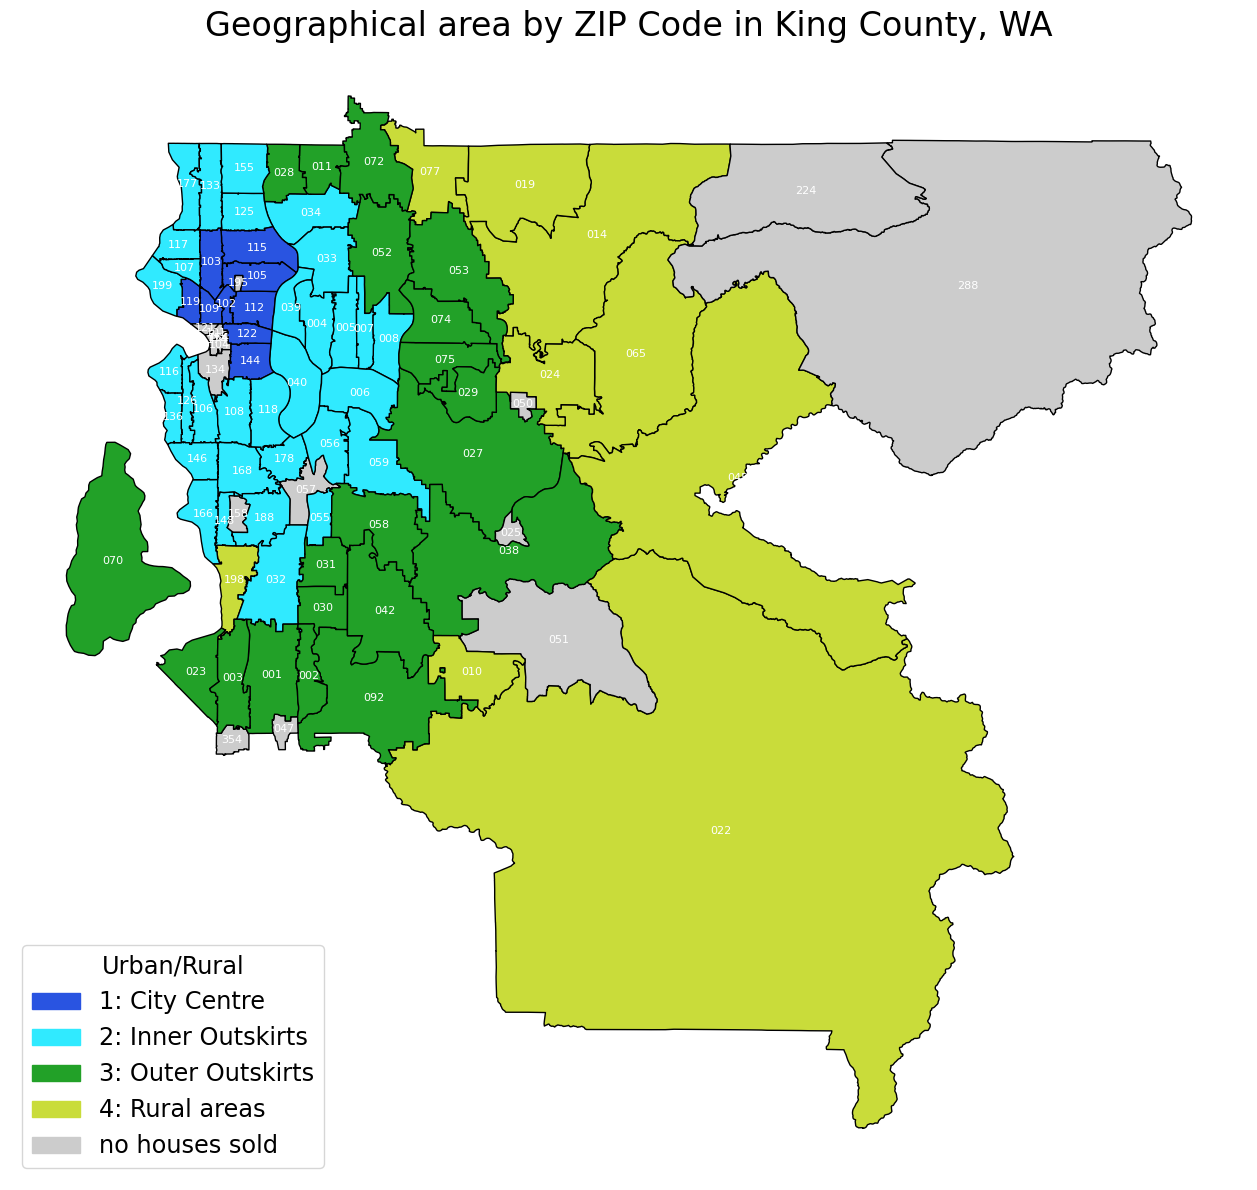

In [130]:
# Assign fill colors (including gray for NaN)
colors = {
    1: "#2954e1",        # blue
    2: "#30eaff",        # cyan
    3: "#22a128",        # green
    4: "#c9dc3a",        # yellow
    np.nan: '#cccccc'
}
d_legend = {
    1: '1: City Centre',        # blue
    2: '2: Inner Outskirts',    # cyan
    3: '3: Outer Outskirts',    # green
    4: '4: Rural areas',        # yellow
    np.nan: 'no houses sold'
}

# Plot the map
fig, ax = plt.subplots(figsize=(13, 12))
merged.plot(ax=ax, cmap=None, color=merged['geo_area'].map(colors),
            legend=True, edgecolor='black')

# Add the zip code suffixes as labels
for idx, row in merged.iterrows():
    if row['geometry'].is_empty:
        continue
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['zip3'],
            fontsize=8, ha='center', va='center', color='white')
    
plt.title('Geographical area by ZIP Code in King County, WA', fontsize=24)
plt.axis('off')

# Add custom legend
legend_handles = [mpatches.Patch(color=color, label=label) for (
    (_, color), (_, label)) in zip(colors.items(), d_legend.items()
)]
ax.legend(handles=legend_handles, title='Urban/Rural', loc='lower left',
          fontsize='xx-large', title_fontsize='xx-large')
plt.tight_layout()
plt.savefig(p_images+"urban_level.png",dpi=300)
plt.show()

#### Plot **Accessibility by Car** Condition

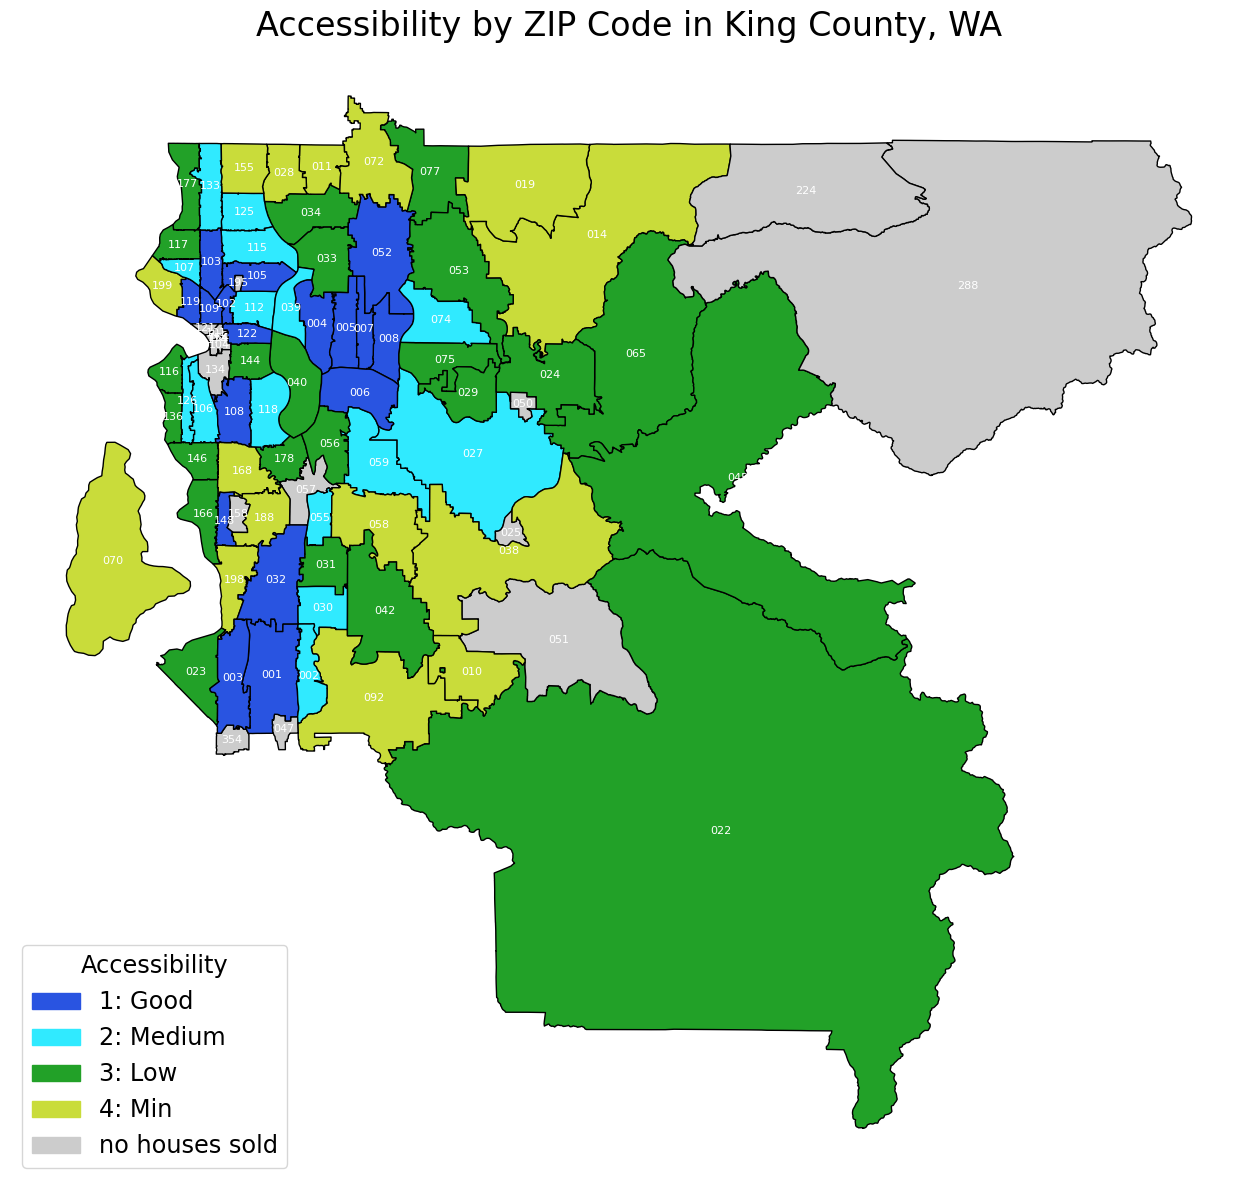

In [131]:
# Assign fill colors (including gray for NaN)
colors = {
    1: "#2954e1",        # blue
    2: "#30eaff",        # cyan
    3: "#22a128",        # green
    4: "#c9dc3a",        # yellow
    np.nan: '#cccccc'
}
d_legend = {
    1: '1: Good',        # blue
    2: '2: Medium',      # cyan
    3: '3: Low',         # green
    4: '4: Min',         # yellow
    np.nan: 'no houses sold'
}

# Plot the map
fig, ax = plt.subplots(figsize=(13, 12))
merged.plot(ax=ax, cmap=None, color=merged['accessibility'].map(colors),
            legend=True, edgecolor='black')

# Add the zip code suffixes as labels
for idx, row in merged.iterrows():
    if row['geometry'].is_empty:
        continue
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['zip3'],
            fontsize=8, ha='center', va='center', color='white')

plt.title('Accessibility by ZIP Code in King County, WA', fontsize=24)
plt.axis('off')

# Add custom legend
legend_handles = [mpatches.Patch(color=color, label=label) for (
    (_, color), (_, label)) in zip(colors.items(), d_legend.items()
)]
ax.legend(handles=legend_handles, title='Accessibility', loc='lower left',
          fontsize='xx-large', title_fontsize='xx-large')
plt.tight_layout()
plt.savefig(p_images+"access_level.png",dpi=300)
plt.show()

#### Plot **Public Surveillance** Condition

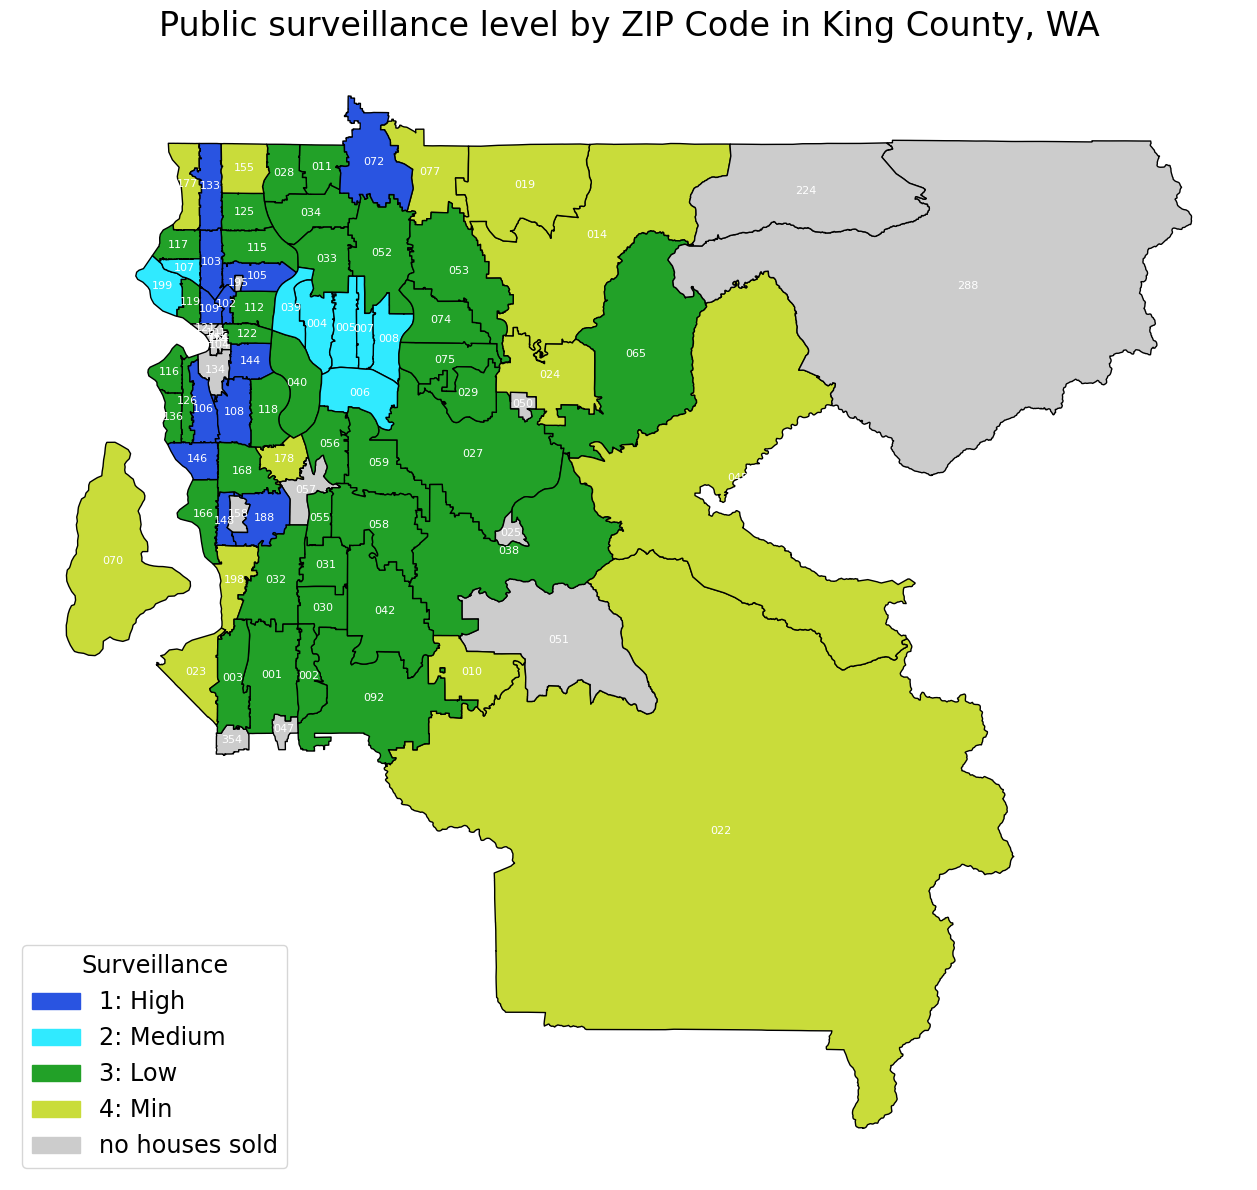

In [132]:
# Assign fill colors (including gray for NaN)
colors = {
    1: "#2954e1",        # blue
    2: "#30eaff",        # cyan
    3: "#22a128",        # green
    4: "#c9dc3a",        # yellow
    np.nan: '#cccccc'
}
d_legend = {
    1: '1: High',        # blue
    2: '2: Medium',      # cyan
    3: '3: Low',         # green
    4: '4: Min',         # yellow
    np.nan: 'no houses sold'
}

# Plot the map
fig, ax = plt.subplots(figsize=(13, 12))
merged.plot(ax=ax, cmap=None, color=merged['surveillance'].map(colors),
            legend=True, edgecolor='black')

# Add the zip code suffixes as labels
for idx, row in merged.iterrows():
    if row['geometry'].is_empty:
        continue
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['zip3'],
            fontsize=8, ha='center', va='center', color='white')
    
plt.title('Public surveillance level by ZIP Code in King County, WA', fontsize=24)
plt.axis('off')

# Add custom legend
legend_handles = [mpatches.Patch(color=color, label=label) for (
    (_, color), (_, label)) in zip(colors.items(), d_legend.items()
)]
ax.legend(handles=legend_handles, title='Surveillance', loc='lower left',
          fontsize='xx-large', title_fontsize='xx-large')
plt.tight_layout()
plt.savefig(p_images+"surveil_level.png",dpi=300)
plt.show()

#### Plot Zip Code Areas satisfying all Conditions and Store it in csv File

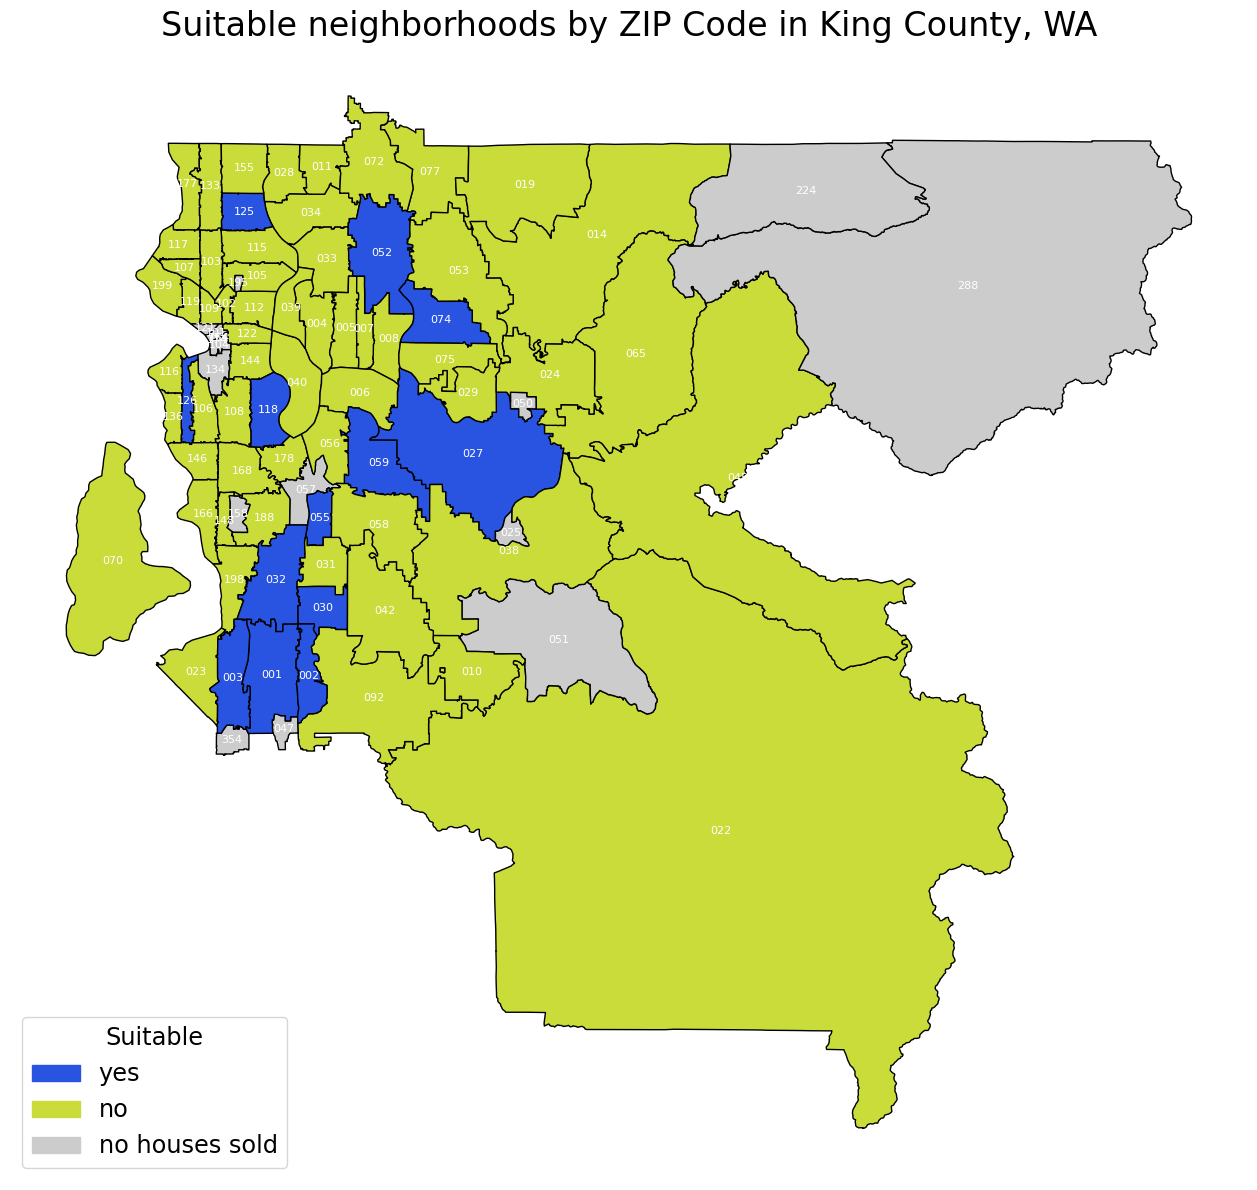

In [133]:
# plot suitable neighborhoods
# geographical area: 2 & 3
# accessibility by car: 1 & 2
# public surveillance: 3 & 4

merged['suitable'] = 1
merged.loc[merged['geo_area'] == 1, 'suitable'] = 0
merged.loc[merged['geo_area'] == 4, 'suitable'] = 0
merged.loc[merged['accessibility'] > 2, 'suitable'] = 0
merged.loc[merged['surveillance'] < 3, 'suitable'] = 0
merged.loc[merged['surveillance'].isna(), 'suitable'] = np.nan

# Assign fill colors (including gray for NaN)
colors = {
    1: "#2954e1",        # blue
    0: "#c9dc3a",        # yellow
    np.nan: '#cccccc'
}
d_legend = {
    1: 'yes',
    2: 'no',
    np.nan: 'no houses sold'
}

# Plot the map
fig, ax = plt.subplots(figsize=(13, 12))
merged.plot(ax=ax, cmap=None, color=merged['suitable'].map(colors),
            legend=True, edgecolor='black')

# Add the zip code suffixes as labels
for idx, row in merged.iterrows():
    if row['geometry'].is_empty:
        continue
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['zip3'],
            fontsize=8, ha='center', va='center', color='white')
    
plt.title('Suitable neighborhoods by ZIP Code in King County, WA', fontsize=24)
plt.axis('off')

# Add custom legend
legend_handles = [mpatches.Patch(color=color, label=label) for (
    (_, color), (_, label)) in zip(colors.items(), d_legend.items()
)]
ax.legend(handles=legend_handles, title='Suitable', loc='lower left',
          fontsize='xx-large', title_fontsize='xx-large')
plt.tight_layout()
plt.savefig(p_images+"suit_neighb.png",dpi=300)
plt.show()

# Store result in csv file
df_suitable = merged.zipcode[merged.suitable == 1]
df_suitable
df_suitable.to_csv('../data/zip_codes_suitable_neighborhoods.csv', index=False)